In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import seaborn as sns
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams


# Importar e separar dados

In [2]:
base = pd.read_csv('dataset_avaliacoes.csv')
vetoriza = CountVectorizer()

In [3]:
vetoriza = CountVectorizer(lowercase=False, max_features=50) # pegar as 50 palavras que mais aparecem 
palavras = vetoriza.fit_transform(base['avaliacao'])
print(palavras.shape)
baseNum = pd.DataFrame.sparse.from_spmatrix(
    palavras, columns = vetoriza.get_feature_names_out()
)

(15501, 50)


# treinar uma regressão logística

In [4]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(baseNum, base['sentimento'], random_state=4978)

logReg = LogisticRegression()
logReg.fit(X_treino, Y_treino)
acuracia = logReg.score(X_teste, Y_teste)
print(acuracia)

0.7982456140350878


# criando nuvem de palavras 

In [8]:
todas_palavras = [texto for texto in base['avaliacao']]
todas_palavras = ' '.join([texto for texto in base['avaliacao']])
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

## todas as palavras

In [12]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

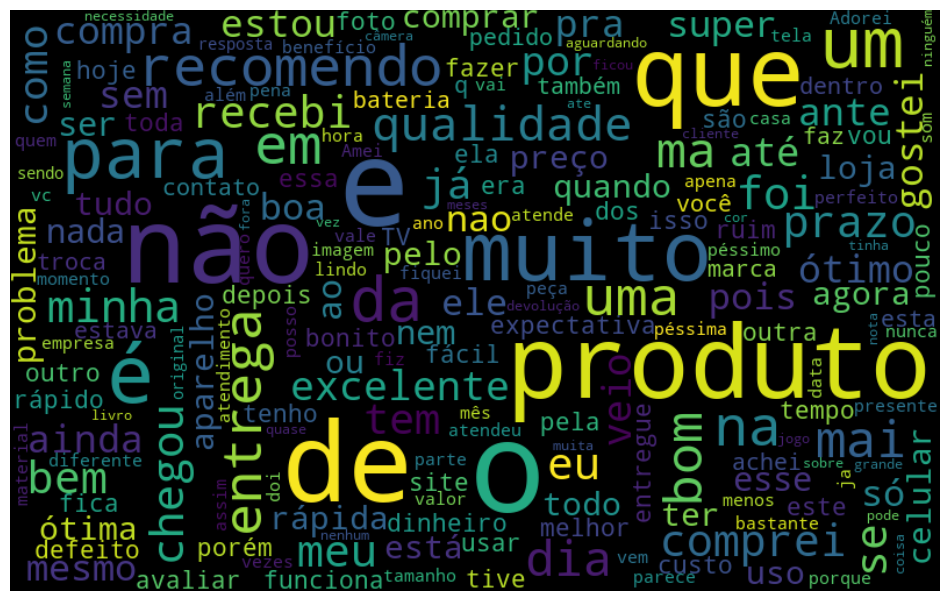

In [13]:
plt.figure(figsize=(12, 12))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## filtrando por sentimento positivo

In [14]:
def nuvem_palavras(texto, coluna_texto, sentimento): 
    texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]
    texto_unido = ' '.join(texto_sentimento)
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(12, 12))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

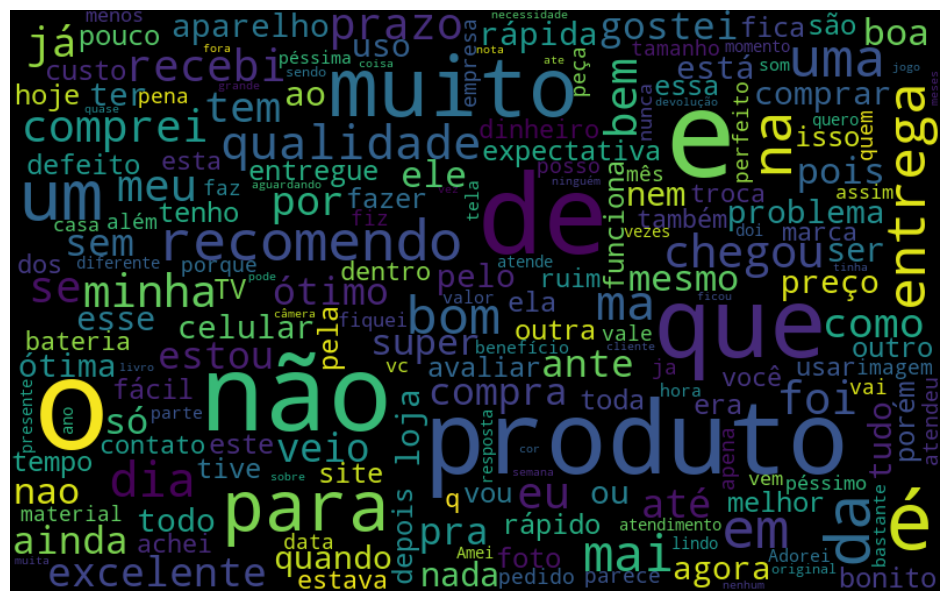

In [15]:
nuvem_palavras(base, 'avaliacao', 'positivo')

## filtrando por sentimento negativo

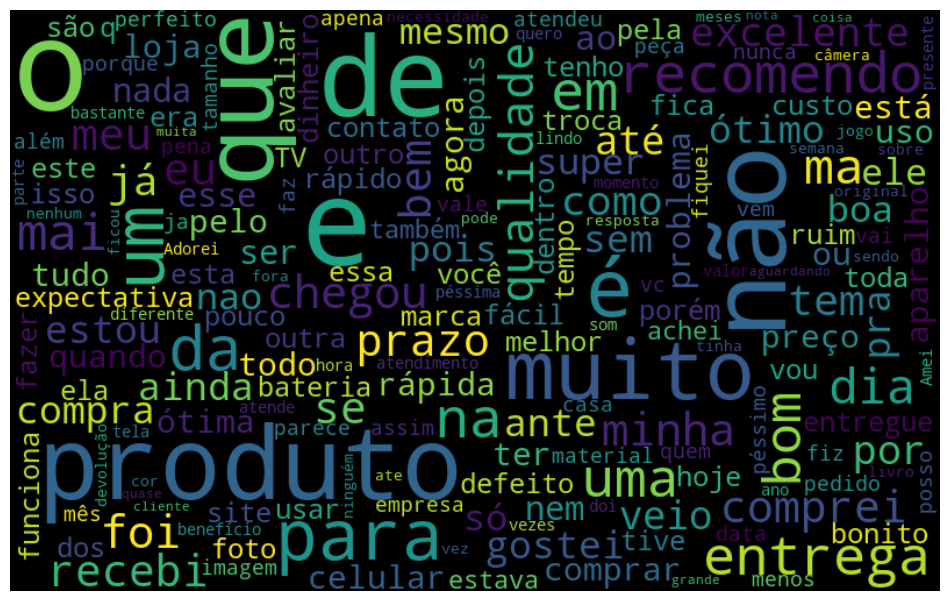

In [16]:
nuvem_palavras(base, 'avaliacao', 'negativo')

# aplicando a tokenização para analisar a frequência de palavras

In [9]:
tocken_espaço = tokenize.WhitespaceTokenizer()
token_frase = tocken_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [10]:
base_frequencia = pd.DataFrame({'palavra': list(frequencia.keys()),
                                'frequencia': list(frequencia.values()) })

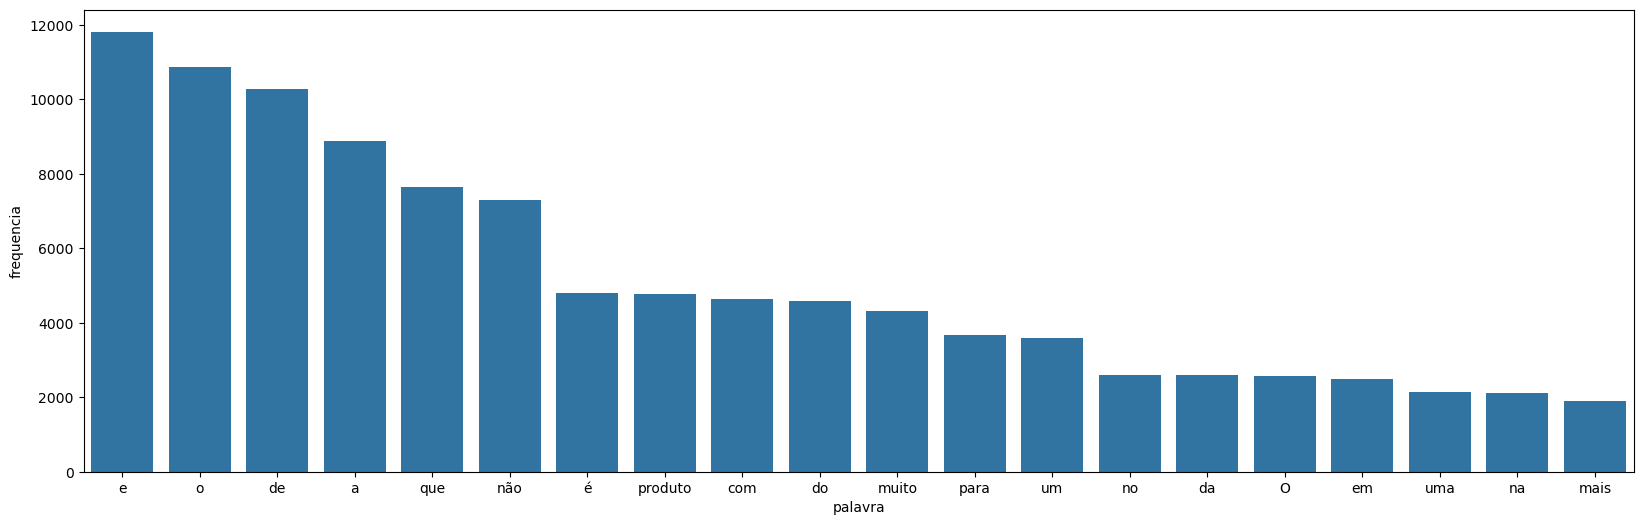

In [19]:
def grafico_frequencia(num_maiores_frequencias):
    maiores_frequencias = base_frequencia.nlargest(columns='frequencia', n=num_maiores_frequencias)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(maiores_frequencias, x='palavra', y='frequencia')

grafico_frequencia(20)


# removendo as stopwords (palavras irrelevantes como "e", "o", "de", etc)

In [5]:
palavras_irrelavantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelavantes   ### esse código vai retornar uma lista de palavras stopwords no português

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [11]:
frase_processada = []

for opiniao in base['avaliacao']:
    palavras_texto = tocken_espaço.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelavantes]
    frase_processada.append(" ".join(nova_frase))

base['tratamento_1'] = frase_processada

# removendo pontuação 

In [12]:
# exemplo

frase = 'esse smartfone superou minhas expectativas, recomendo'

token_pontuação = tokenize.WordPunctTokenizer()
token_frase = token_pontuação.tokenize(frase)
print(token_frase)

['esse', 'smartfone', 'superou', 'minhas', 'expectativas', ',', 'recomendo']


In [13]:
frase_processada = []

for opiniao in base['tratamento_1']:
    palavras_texto = token_pontuação.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelavantes]
    frase_processada.append(' '.join(nova_frase))

base['tratamento_2'] = frase_processada

# removendo acentuação

In [14]:
# teste 

frase = 'Um aparelho ótimo e preço legal.'

teste = unidecode.unidecode(frase)
teste

'Um aparelho otimo e preco legal.'

In [15]:
sem_acento = [unidecode.unidecode(texto) for texto in base.tratamento_2]
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelavantes]

base['tratamento_3'] = sem_acento

frase_processada = []

for opiniao in base['tratamento_3']:
    palavras_texto = token_pontuação.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

base['tratamento_3'] = frase_processada

# uniformizando o texto

In [16]:
# teste

frase = 'ótimo produto. Fiquei feliz DEMAIS!'
print(frase.lower())

ótimo produto. fiquei feliz demais!


In [17]:
frase_processada = []

for opiniao in base.tratamento_3:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuação.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

base['tratamento_4'] = frase_processada

# juntando palavras semelhantes. Por exemplo: gostei e gostando

In [18]:
# exemplo

stemmer = nltk.RSLPStemmer()
stemmer.stem('gostei')

'gost'

In [19]:
frase_processada = [] 

for opiniao in base.tratamento_4:
    palavras_texto = token_pontuação.tokenize(opiniao)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada.append(' '.join(nova_frase))

base['tratamento_5'] = frase_processada

# aplicando a importância das palavras

In [ ]:
# exemplo

frase = ['comprei um ótimo produto', 'comprei um produto ruim']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frase)
pd.DataFrame(matriz.todense(), columns=tfidf.get_feature_names_out())

In [33]:
tfidf_tratado = tfidf.fit_transform(base['tratamento_5'])
X_treino, X_teste, Y_treino, Y_teste = train_test_split(tfidf_tratado, base['sentimento'], random_state=4978)
reglog = LogisticRegression()
reglog.fit(X_treino, Y_treino)
acuracia = reglog.score(X_teste, Y_teste)
print(f"acurácia: {acuracia*100:.2f}%")

acurácia: 85.14%


# capturando contextos

In [39]:
# teste

frase = 'comprei um produto bão'
frase_separada = tocken_espaço.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('comprei', 'um'), ('um', 'produto'), ('produto', 'bão')]

## tfidf com 50 palavras

In [40]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(base['tratamento_5'])
X_treino, X_teste, Y_treino, Y_teste = train_test_split(vetor_tfidf, base['sentimento'], random_state=4978)
reglog.fit(X_treino, Y_treino)
acuracia_tfidf = reglog.score(X_teste, Y_teste)
print(f"acurácia: {acuracia_tfidf*100:.2f}%")

acurácia: 85.22%


## tfidf com 1000

In [55]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(base['tratamento_5'])
X_treino, X_teste, Y_treino, Y_teste = train_test_split(vetor_tfidf, base['sentimento'], random_state=4978)
reglog.fit(X_treino, Y_treino)
acuracia_tfidf = reglog.score(X_teste, Y_teste)
print(f"acurácia: {acuracia_tfidf*100:.2f}%")

acurácia: 91.85%


## com todas as palavras (não fez diferença)

In [52]:
tfidf_total = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf_total.fit_transform(base['tratamento_5'])
X_treino, X_teste, Y_treino, Y_teste = train_test_split(vetor_tfidf, base['sentimento'], random_state=4978)
reglog.fit(X_treino, Y_treino)
acuracia_tfidf = reglog.score(X_teste, Y_teste)
print(f"acurácia: {acuracia_tfidf*100:.2f}%")

acurácia: 91.85%


## analisando os coeficientes da regressão

In [59]:
# coeficientes positivos 

pesos = pd.DataFrame(
    reglog.coef_[0].T,
    index = tfidf_1000.get_feature_names_out()
)

pesos.nlargest(50, 0)

,0
otim,7.808669
excel,7.449268
bom,5.990104
perfeit,5.078838
ador,5.034260
satisfeit,4.816196
rap,4.232814
lind,3.762726
ame,3.509609
maravilh,3.477517


In [63]:
# coeficientes negativos 

pesos = pd.DataFrame(
    reglog.coef_[0].T,
    index = tfidf_1000.get_feature_names_out()
)

pesos.nsmallest(50, 0)

,0
pess,-4.632123
receb,-4.067055
ruim,-4.059795
frac,-3.694803
horri,-3.376634
defeit,-3.033516
fragil,-3.026329
decepcion,-2.899696
devolv,-2.893880
dinh,-2.692323


# comparando modelos para ver se essas transformações fizeram sentido

In [20]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

### tratamento 1

In [21]:
classificar_texto(base, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


### tratamento 2

In [22]:
classificar_texto(base, 'tratamento_2', 'sentimento')

Acurácia do modelo com 'tratamento_2': 81.09%


### tratamento 3

In [23]:
classificar_texto(base, 'tratamento_3', 'sentimento')

Acurácia do modelo com 'tratamento_3': 82.04%


### tratamento 4

In [24]:
classificar_texto(base, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.75%


### tratamento 5

In [25]:
classificar_texto(base, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.11%
